<img align="left" src="https://rhyme.com/assets/img/logo-dark.png"> <h1 align="center"> Support Vector Machines</h1>

SVMs are a powerful class of supervised learning algorithms for classification and regression problems. In the context of classification, SVMs can be viewed as maximum margin linear classifiers. 

The SVM uses an objective which explicitly encourages low out-of-sample error (good generalization performance). The $D$ dimensional data are divided into classes by maximizing the margin between the hyperplanes for the classes.

Note that we assume the two classes in the data are linearly separable. Later, for non-linear boundaries, we will use the kernel trick to exploit higher (possibly infinite) dimensional $z$-spaces, where the classes are linearly separable, find the support vectors in this space and map it back to the dimensionality of our problem.

# 1) Building SVM manually

## Linearly separable classes:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Fake Volcano Locations  (Active vs Dormant Volcanos)

In [6]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=50, 
                             centers=2, 
                             random_state=0,
                             cluster_std=0.60)

In [9]:
X[: 5]

array([[1.41281595, 1.5303347 ],
       [1.81336135, 1.6311307 ],
       [1.43289271, 4.37679234],
       [1.87271752, 4.18069237],
       [2.09517785, 1.0791468 ]])

In [10]:
y[: 5]

array([1, 1, 0, 0, 1])

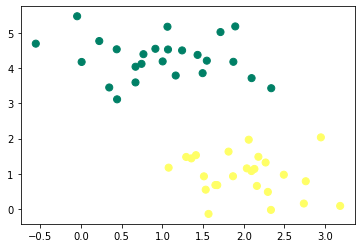

In [7]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='summer');

The linear classifiers we know will draw a straight line between the classes. With this example, we could do this by hand. But what should strike you is that there is more than one decision boundary (lines) that can achieve minimum in-sample error.  Let's plot them below.

## Many possible separators:

In [37]:
# find the largest and smallest values of X axis
x_min = X[:, 0].min()
x_max = X[: , 0].max()

x_min, x_max

(-0.5555238109539522, 3.1851579396666305)

we can see that it is between -1 and 3.5

In [14]:
# Fitted Values of X (assumption)
xfit = np.linspace(-1, 3.5)

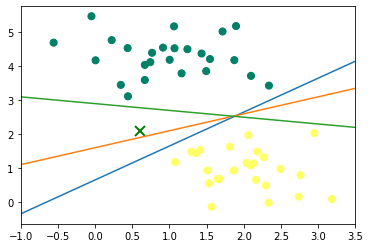

In [43]:
plt.scatter(X[: , 0], X[:, 1], c=y, s=50, cmap='summer');

# Let's say we have a new single volcano
single_volcano = (0.6, 2.1)
plt.plot(single_volcano[0], single_volcano[1], 'x', color='green', markeredgewidth=2, markersize=10);

# create the lines that will separate the points
lines = [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)] 
for m, b in lines:
    yfit = m * xfit + b # fitted y value
    plt.plot(xfit, yfit)
    
plt.xlim(-1, 3.5);

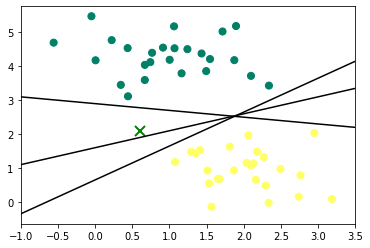

In [42]:
# plot the point
plt.scatter(X[:, 0], X[: , 1], c=y, s=50, cmap='summer');

# Single New Volcano
single_volcano = (0.6, 2.1)
plt.plot(single_volcano[0], single_volcano[1], 'x', color='green', markersize=10, markeredgewidth=2)

# Three Lines to separate the points
lines = [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)] 
for m,b in lines:
    yfit = m * xfit + b # fitted y value
    plt.plot(xfit, yfit, '-k'); # '-k' to make all the lines black color
    
plt.xlim(-1, 3.5);

## Maximum margin linear classifiers:

For a hyperplane defined by weight $w$ and bias $b$, a linear discriminant is given by:

$$w^T x + b \left\{\begin{matrix} \geq 0\ class +1& \\ <0\ class -1 \end{matrix}\right.$$

In the above plot, we notice that for a point $x$ that is close the decision boundary at $w^T x +b =0$, a small change in $x$ can lead to a change in classification. Now assuming that the data is linearly separable, we impose that for the training data, the decision boundary should be separated from the data by some finite amount $\epsilon ^2$:

$$w^T x + b \left\{\begin{matrix} \geq \epsilon^2\ class +1& \\ <-\epsilon^2\ class -1 \end{matrix}\right.$$

For the inequality above, we conveniently set $\epsilon = 1$ so that a point $x_+$ from class +1 that is closest to the decision boundary satisfies

 $$w^T x_+ + b =1$$

and a point $x_-$ from class -1 that is closest to the decision boundary satisfies

 $$w^T x_- + b =-1$$

## Plotting the margins:

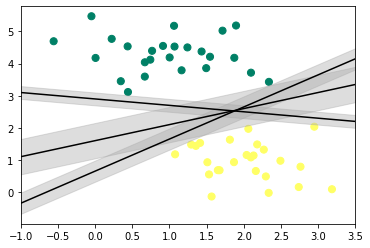

In [49]:
xfit = np.linspace(-1, 3.5)

# plot the points
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='summer')

# Three Lines to separate the points with Margins Values
lines = [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)] 

# lines with margins
for m, b, d in lines: 
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    
    plt.fill_between(xfit, yfit - d, yfit + d, 
                     edgecolor='none',
                    color='#AAAAAA',
                    alpha=0.4)
    
plt.xlim(-1, 3.5);

When using SVMs, the decision boundary that maximizes this *margin* is chosen as the optimal model. 

## (Optional) What is the (hard) margin?

From vector algebra the distance from the origin along the direction $w$ to a point $x$ is given by

$$\frac{w^T x}{\sqrt{w^T w}}$$

The $margin$ between the hyperplanes for the classes is the difference between the two distances along the direction of $w$ which is

$$\frac{w^T x}{\sqrt{w^T w}}(x_+ - x_-) = \frac{2}{\sqrt{w^T w}}$$

To maximize the the distance between two hyperplanes, we need to minimise the length $w^T w$. We know that for each $x^n$ we have a corresponding class label $y^n \in \left \{ +1, -1 \right \}$. So to classify the training labels correctly and maximize this margin, the optimzation problem is equivalent to:

$minimize\ \frac{1}{2}w^Tw$ subject to the constraints  $y^n(w^Tx^n +b)\geq 1$, and $n =1,..., N.$

Notice that this formulation is a *quadratic programming* problem -- something we know how to work with. This is known as a hard margin SVM  due to the presence of the exact classification constraint "$\geq 1$", which means that the points used as support vectors exactly fall on the boundary of the margin.

# 2) SVM in practice:

Using the data from before, let us now train an SVM model with Scikit-Learn's suppport vector classifier. We'll defer the discussion about kernels for later in the course. For the time being, we will use a `linear` kernel and set the `C` parameter to an arbitrarily large number.

In [51]:
from sklearn.svm import SVC

In [53]:
model = SVC(kernel='linear', C=1E10)
model.fit(X, y)

SVC(C=10000000000.0, kernel='linear')

## Visualizing the SVM decision boundaries:

In [54]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

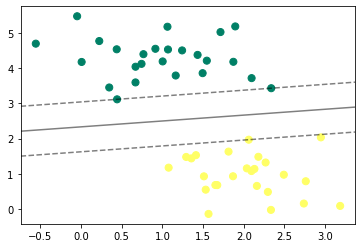

In [57]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='summer', s=50);
plot_svc_decision_function(model);

**The bold line dividing the data maximizes the margin between the two sets of points. Count the number of training points just touching the margin. These three points are known as the *support vectors*. These points exactly satisfying the margin are stored in the `support_vectors_` attribute of the classifier in Scikit-Learn.**

In [58]:
# support vectors of the model, We can see those points in the chart above, which are touching the margin.

odel.support_vectors_

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

# 3) Facial Recognition Example

In [61]:
from sklearn.datasets import fetch_lfw_people

In [63]:
faces = fetch_lfw_people(min_faces_per_person=60)

In [65]:
faces.target[:10]

array([1, 1, 0, 2, 1, 1, 3, 0, 1, 2], dtype=int64)

In [66]:
faces.images.shape

(820, 62, 47)

In [67]:
faces

{'data': array([[ 82.333336,  74.666664,  72.      , ...,  26.      ,  29.      ,
          29.333334],
        [ 69.333336,  70.      ,  82.666664, ...,   6.      ,   9.      ,
          10.      ],
        [ 94.666664, 104.      , 133.66667 , ...,  17.666666,  18.666666,
          17.333334],
        ...,
        [135.66667 , 117.666664, 139.66667 , ...,  76.666664,  81.666664,
          81.666664],
        [126.666664, 118.666664, 133.      , ...,  68.333336,  64.666664,
          56.      ],
        [ 65.333336,  86.      , 105.666664, ..., 179.      ,  93.      ,
          10.333333]], dtype=float32),
 'images': array([[[ 82.333336 ,  74.666664 ,  72.       , ...,  72.       ,
           40.333332 ,  42.       ],
         [ 82.       ,  74.       ,  76.       , ...,  84.666664 ,
           43.       ,  35.666668 ],
         [ 82.       ,  80.333336 ,  81.       , ...,  97.       ,
           57.333332 ,  39.666668 ],
         ...,
         [135.66667  , 149.66667  , 155.66667  , .

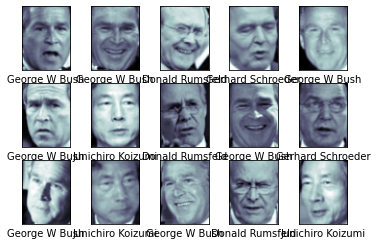

In [74]:
# Check out sample images

fig, ax = plt.subplots(3, 5)
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[], xlabel=faces.target_names[faces.target[i]])

### Building model with PCA & SVC

In [80]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

In [83]:
pca = PCA(n_components=150, whiten=True, random_state=42)
svc = SVC(kernel='rbf', class_weight='balanced')

model = make_pipeline(pca, svc)

In [84]:
# train, test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(faces['data'], faces['target'], test_size=0.2, random_state=42)

### Find Best Model using Grid Search CV

In [86]:
from sklearn.model_selection import GridSearchCV

param_grid ={
    'svc__C': [1, 5, 10, 15],
    'svc__gamma': [0.0001, 0.0005, 0.001, 0.005],
}

In [87]:
grid = GridSearchCV(model, param_grid=param_grid, cv=5)
%time grid.fit(X_train, y_train)

Wall time: 31.2 s


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('pca',
                                        PCA(n_components=150, random_state=42,
                                            whiten=True)),
                                       ('svc', SVC(class_weight='balanced'))]),
             param_grid={'svc__C': [1, 5, 10, 15],
                         'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]})

In [92]:
grid.best_params_

{'svc__C': 10, 'svc__gamma': 0.001}

In [94]:
grid.best_estimator_

Pipeline(steps=[('pca', PCA(n_components=150, random_state=42, whiten=True)),
                ('svc', SVC(C=10, class_weight='balanced', gamma=0.001))])

### Prediction using best model

In [95]:
final_model = grid.best_estimator_
y_pred = final_model.predict(X_test)

### Visualize the data

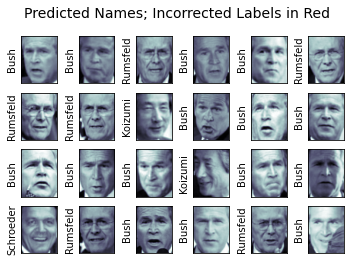

In [106]:
fig, ax = plt.subplots(4, 6)
for i, axi in enumerate(ax.flat):
    axi.imshow(X_test[i].reshape(62, 47), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[y_pred[i]].split()[-1], 
                  color='black' if y_pred[i] == y_test[i] # correct label
                  else 'red') # incorrect label

fig.suptitle('Predicted Names; Incorrected Labels in Red', size=14);

### Evaluation Metrics

In [108]:
from sklearn.metrics import classification_report

In [122]:
print(classification_report(y_test, y_pred, 
                            target_names=faces.target_names))

                   precision    recall  f1-score   support

  Donald Rumsfeld       0.84      0.87      0.85        30
    George W Bush       0.93      0.95      0.94       101
Gerhard Schroeder       0.87      0.87      0.87        23
Junichiro Koizumi       1.00      0.70      0.82        10

         accuracy                           0.91       164
        macro avg       0.91      0.85      0.87       164
     weighted avg       0.91      0.91      0.91       164



In [117]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
cm = cm.T

print(cm)

[[26  3  2  0]
 [ 4 96  1  2]
 [ 0  2 20  1]
 [ 0  0  0  7]]


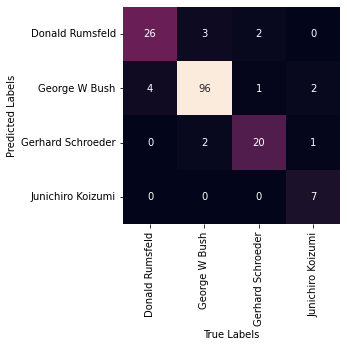

In [126]:
sns.heatmap(data=cm, 
            square=True, 
            annot=True, 
            cbar=False,
            xticklabels=faces.target_names,
            yticklabels=faces.target_names
           );

plt.xlabel('True Labels')
plt.ylabel('Predicted Labels');